In [1]:
import pygame
import math
import sys

# Inicialización de Pygame
pygame.init()

# Definición de las constantes del programa
window_width = 800
window_height = 600
cart_width = 80
cart_height = 50
cart_y = window_height - cart_height - 20
pendulum_length = 200
pendulum_radius = 20
pendulum_mass = 20
pendulum_theta = math.pi / 4
pendulum_omega = 0
pendulum_alpha = 0
pendulum_friction = 0.1
cart_x = window_width / 2 - cart_width / 2
cart_speed = 0
cart_acceleration = 0
cart_friction = 0.01

# Definición de los colores utilizados
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (255, 0, 0)

# Creación de la ventana del juego
window = pygame.display.set_mode((window_width, window_height))

# Definición del reloj del juego
clock = pygame.time.Clock()

# Función para actualizar la posición y velocidad del péndulo
def update_pendulum(cart_position):
    global pendulum_theta, pendulum_omega, pendulum_alpha
    
    # Cálculo de la fuerza neta sobre el péndulo
    g = 9.81
    F_net = pendulum_mass * g * math.sin(pendulum_theta)
    F_friction = -pendulum_friction * pendulum_omega
    F_horizontal = -F_net * math.sin(pendulum_theta) - F_friction
    
    # Cálculo de la aceleración angular del péndulo
    pendulum_alpha = F_horizontal / (pendulum_mass * pendulum_radius)
    
    # Actualización de la velocidad y posición angular del péndulo
    pendulum_omega += pendulum_alpha
    pendulum_theta += pendulum_omega
    
    # Actualización de la posición del péndulo
    pendulum_x = cart_position #+ window_width / 2
    pendulum_y = cart_y - pendulum_length * math.cos(pendulum_theta)
    
    # Dibujado del péndulo
    pygame.draw.line(window, BLACK, (int(cart_position) + cart_width / 2, cart_y + cart_height / 2), (int(pendulum_x), int(pendulum_y + pendulum_radius)), 2)
    pygame.draw.circle(window, BLACK, (int(pendulum_x), int(pendulum_y)), pendulum_radius)

# Función para actualizar la posición y velocidad del carrito
def update_cart(keys_pressed):
    global cart_x, cart_speed
    
    # Cálculo de la aceleración del carrito
    if keys_pressed[pygame.K_LEFT]:
        cart_acceleration = -0.5
    elif keys_pressed[pygame.K_RIGHT]:
        cart_acceleration = 0.5
    else:
        cart_acceleration = 0
        cart_speed -= cart_speed * cart_friction
        
    # Actualización de la velocidad y posición del carrito
    cart_speed += cart_acceleration
    cart_x += cart_speed
    
    # Restricción de los límites del carrito
    if cart_x < 0:
        cart_x = 0
        cart_speed = 0
    elif cart_x > window_width - cart_width:
        cart_x = window_width - cart_width
        cart_speed = 0
    
    # Dibujado del carrito
    pygame.draw.rect(window, RED, (int(cart_x), int(cart_y), cart_width, cart_height))

run = True
while run:
# Manejo de eventos de Pygame
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
        
        # Actualización de la posición del péndulo y del carrito
        keys_pressed = pygame.key.get_pressed()
        update_cart(keys_pressed)
        window.fill(WHITE)
        update_pendulum(cart_x)

        # Actualización de la ventana del juego
        pygame.display.update()
        clock.tick(60)

pygame.quit()
sys.exit()

pygame 2.1.2 (SDL 2.0.18, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# Wesley Fernandes
# python simple pendulum with pygame
 
import pygame
import math
 
#VARIABLES
width, height = 800, 400   # set the width and height of the window
                           # (you can increase or decrease if you want to, just remind to keep even numbers)
Out = False                # if True,out of while loop, and close pygame
acceleration = False       # when true it allow us to find the acceleration and damping for the pendulum
length = 0                 # the length between the ball and the support
angle = 0                  # the angle that you begin when click in window
vel = 0                    # velocity that angle is increased and damped
Aacc = 0                   # acceleration
 
#COLORS
white = (255,255,255)
black = (0,0,0)
gray = (150, 150, 150)
Dark_red = (150, 0, 0)
 
#BEFORE START
pygame.init()
background = pygame.display.set_mode((width, height))
clock = pygame.time.Clock()
 
class ball(object):
 
    def __init__(self, XY, radius):  # Set ball coordenates and radius
        self.x = XY[0]
        self.y = XY[1]
        self.radius = radius
 
    def draw(self, bg):  # Draw circle and line based on XY coordinates
        pygame.draw.lines(bg, black, False, [(width/2, 50), (self.x, self.y)], 2)
        pygame.draw.circle(bg, black, (self.x, self.y), self.radius)
        pygame.draw.circle(bg, Dark_red, (self.x, self.y), self.radius - 2)
 
 
def grid():  # Draw a grid behind the pendulum
    for x in range(50, width, 50):
        pygame.draw.lines(background, gray, False, [(x, 0), (x, height)])
        for y in range(50, height, 50):
            pygame.draw.lines(background, gray, False, [(0, y), (width, y)])
    pygame.draw.circle(background, black, (int(width/2), 50), 5)
 
def angle_Length():  # Send back the length and angle at the first click on screen
    length = math.sqrt(math.pow(pendulum.x - width/2, 2) + math.pow(pendulum.y - 50, 2))
    angle = math.asin((pendulum.x - width/2)/ length)
    return (angle, length)
 
def get_path(first_angle, length): # with angle and length calculate x and y position
    pendulum.x = round(width/2 + length * math.sin(angle))
    pendulum.y = round(50 + length * math.cos(angle))
 
def redraw(): # Clean up the screen and start a new grid and new frame of pendulum with new coordinates
    background.fill(white)
    grid()
    pendulum.draw(background)
    pygame.display.update()
 
 
pendulum = ball((int(width / 2),-100), 5) # I start the class with some random coordinates
 
while not Out:
    clock.tick(120)             #Set how many frames are draw per second
                                #If changed, maybe, could be a good idea change some values at acceleration
 
    for event in pygame.event.get():                     #
        if event.type == pygame.QUIT:                    #
            Out = True                                   #
        if event.type == pygame.MOUSEBUTTONDOWN:         #  Read if you want go out
            pendulum = ball(pygame.mouse.get_pos(), 15)  #             or
            angle, length = angle_Length()               #   click the mouse button
            acceleration = True                          #
 
    if acceleration:   # Increase acceleration and damping in the pendulum moviment
        Aacc = -0.005 * math.sin(angle)
        vel += Aacc
        vel *= 0.99  # damping factor
        angle += vel
        get_path(angle, length)
 
    redraw()
 
pygame.quit()

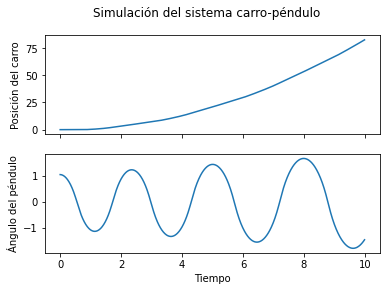

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cart_pendulum(F, m=1.0, M=5.0, L=2.0, g=9.81, dt=0.01, t_max=10.0):
    # Define las condiciones iniciales del sistema
    theta_0 = np.pi/3.0  # Ángulo inicial del péndulo
    x_0 = 0.0  # Posición inicial del carro
    v_0 = 0.0  # Velocidad inicial del carro
    omega_0 = 0.0  # Velocidad angular inicial del péndulo
    
    # Crea un arreglo de tiempo y un arreglo para almacenar las soluciones
    t = np.arange(0.0, t_max, dt)
    x = np.zeros_like(t)
    theta = np.zeros_like(t)
    
    # Itera a través del tiempo y resuelve las ecuaciones de movimiento
    for i, t_i in enumerate(t):
        # Calcula la aceleración angular del péndulo
        num = -g*(m+M)*np.sin(theta_0) - F*L*np.cos(theta_0)*np.sin(theta_0)
        den = L*(m+M) - M*L*np.cos(theta_0)**2
        alpha = num/den
        
        # Calcula la aceleración del carro
        a = (F + m*L*alpha*np.cos(theta_0) - m*L*(omega_0**2)*np.sin(theta_0))/(m+M)
        
        # Integra las ecuaciones de movimiento para el carro y el péndulo
        x_0 += v_0*dt
        v_0 += a*dt
        theta_0 += omega_0*dt
        omega_0 += alpha*dt
        
        # Almacena las soluciones en los arreglos
        x[i] = x_0
        theta[i] = theta_0
    
    # Grafica la posición del carro y el ángulo del péndulo como función del tiempo
    fig, axs = plt.subplots(2, sharex=True)
    fig.suptitle('Simulación del sistema carro-péndulo')
    axs[0].plot(t, x)
    axs[0].set_ylabel('Posición del carro')
    axs[1].plot(t, theta)
    axs[1].set_ylabel('Ángulo del péndulo')
    axs[1].set_xlabel('Tiempo')
    plt.show()

cart_pendulum(10)

In [ ]:
# Función para actualizar la posición y velocidad del péndulo
def update_pendulum(cart_position):
    global pendulum_theta, pendulum_omega, pendulum_alpha
    
    # Cálculo de la fuerza neta sobre el péndulo
    g = 9.81
    # F_net = pendulum_mass * g * math.sin(pendulum_theta)
    # F_friction = - pendulum_friction * pendulum_omega
    # F_horizontal = -F_net * math.sin(pendulum_theta) - F_friction
    
    # Cálculo de la aceleración angular del péndulo
    #pendulum_alpha = F_horizontal / (pendulum_mass * pendulum_radius)
    
    numerador = g * math.sin(pendulum_theta) + math.cos(pendulum_theta) * ((- F - pendulum_mass * pendulum_length * np.power(pendulum_omega,2) * math.sin(pendulum_theta)) /(cart_mass*pendulum_mass))
    denominador = pendulum_length * (4/3 - (pendulum_mass * np.power(math.cos(pendulum_theta), 2)) / (pendulum_mass + cart_mass))

    pendulum_alpha = numerador/denominador

    # Actualización de la velocidad y posición angular del péndulo
    pendulum_omega += pendulum_alpha 
    pendulum_theta += (pendulum_omega + pendulum_alpha * np.power(dt,2)/2)*0.95
    #pendulum_theta+=0.01
    # Actualización de la posición del péndulo
   
    pendulum_x = cart_x + cart_width/2 + pendulum_length * math.sin(pendulum_theta)
    pendulum_y = cart_y - pendulum_length * math.cos(pendulum_theta)
    
    # Dibujado del péndulo
    pygame.draw.line(window, WHITE, (int(cart_position) + cart_width / 2, cart_y), (int(pendulum_x), int(pendulum_y)), 5)
    pygame.draw.circle(window, WHITE, (int(pendulum_x), int(pendulum_y)), pendulum_radius)

In [ ]:
import pygame
import math

# Parámetros físicos del sistema
g = 9.8
m = 1.0
M = 5.0
L = 100.0
x = 50.0
theta = math.pi / 4.0
dx = 0.0
dtheta = 0.0
F = 0.0

force_mag = 0.5

# Parámetros de la simulación
fps = 60
dt = 1.0 / fps
last_ticks = pygame.time.get_ticks()

# Colores
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

# Inicializa Pygame
pygame.init()

# Configura la ventana de la simulación
window_width = 800
window_height = 600
window = pygame.display.set_mode((window_width, window_height))
pygame.display.set_caption("Carro con péndulo")

# Función para actualizar la posición del carro
def update_car():
    global x, dx, F

    # Calcula la aceleración del carro
    a = (F - m * g * math.sin(theta) * math.cos(theta)) / M

    # Integra las ecuaciones de movimiento para el carro
    x += dx * dt
    dx += a * dt

    # Limita la posición del carro a la ventana de la simulación
    if x < 0.0:
        x = 0.0
        dx = 0.0
    elif x > window_width:
        x = window_width
        dx = 0.0

    # Dibuja el carro en la pantalla
    pygame.draw.rect(window, WHITE, (int(x) - 20, window_height - 80, 40, 40))

# Función para actualizar la posición del péndulo
def update_pendulum():
    global theta, dtheta

    # Calcula la aceleración angular del péndulo
    num = -g * (2 * m + M) * math.sin(theta) - m * L * dtheta ** 2 * math.sin(theta) * math.cos(theta)
    den = L * (2 * m + M - m * math.cos(theta) ** 2)
    dtheta += num / den * dt

    # Integra las ecuaciones de movimiento para el péndulo
    theta += dtheta * dt

    # Dibuja el péndulo en la pantalla
    pendulum_x = x + L * math.sin(theta)
    pendulum_y = window_height - 80 - L * math.cos(theta)
    pygame.draw.line(window, WHITE, (int(x), window_height - 80), (int(pendulum_x), int(pendulum_y)), 5)
    pygame.draw.circle(window, WHITE, (int(pendulum_x), int(pendulum_y)), 20)


# Bucle principal de la simulacion
run = True
while run:
    # Manejo de eventos de Pygame
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
        
        # Actualización de la posición del péndulo y del carrito
        keys_pressed = pygame.key.get_pressed()
        if keys_pressed[pygame.K_LEFT]:
            F = -force_mag
        elif keys_pressed[pygame.K_RIGHT]:
            F = force_mag
        else:
            F = 0

    # Calcula la aceleración angular del péndulo
    num = -g*(m+M)*math.sin(pendulum_theta) - F*L*math.cos(pendulum_theta)*math.sin(pendulum_theta)
    den = L*(m+M) - M*L*math.cos(pendulum_theta)**2
    alpha = num/den

    # Integra las ecuaciones de movimiento para el péndulo
    pendulum_theta += pendulum_omega*dt
    pendulum_omega += alpha*dt

    # Integra las ecuaciones de movimiento para el carrito
    cart_x += cart_velocity*dt
    cart_velocity += cart_acceleration*dt

    # Limita la velocidad del carrito
    if abs(cart_velocity) > max_cart_velocity:
        cart_velocity = max_cart_velocity * abs(cart_velocity) / cart_velocity

    # Limita la posición del carrito
    if cart_x < 0:
        cart_x = 0
        cart_velocity = 0
    elif cart_x > window_width - cart_width:
        cart_x = window_width - cart_width
        cart_velocity = 0

    # Dibuja el carro en la pantalla
    window.fill(BLACK)
    pygame.draw.rect(window, WHITE, (cart_x, cart_y, cart_width, cart_height))
    
    # Dibuja el péndulo en la pantalla
    pendulum_x = cart_x + cart_width/2 + pendulum_length * math.sin(pendulum_theta)
    pendulum_y = cart_y - pendulum_length * math.cos(pendulum_theta)
    pygame.draw.line(window, WHITE, (int(cart_x) + cart_width / 2, cart_y), (int(pendulum_x), int(pendulum_y)), 5)
    pygame.draw.circle(window, WHITE, (int(pendulum_x), int(pendulum_y)), pendulum_radius)

    # Actualiza la ventana del juego
    pygame.display.update()

    # Espera para mantener la tasa de refresco deseada
    clock.tick(fps)

# Cierra Pygame y termina el programa
pygame.quit()
sys.exit()

NameError: name 'pendulum_theta' is not defined

In [ ]:
import pygame
import math
import numpy as np

clock = pygame.time.Clock()
pygame.init()
size = (width, height) = (600,500)
screen = pygame.display.set_mode(size)


class pendulum:
    def __init__(self,x,y,x0,y0):
        self.x0 = np.array((x0, y0))
        self.x = np.array((x, y), dtype=float)
        self.v = np.zeros((2,), dtype=float)
        self.a = np.zeros((2,), dtype=float)
    def CalcForce(self):
        dx = self.x0 - self.x
        angle = math.atan2(-dx[0], dx[1])
        a = g[1]*math.sin(angle)  # tangential accelation due to gravity
        self.a[0] = at*math.cos(angle)
        self.a[1] = at*math.sin(angle)
    def move(self):
        #print np.dot(self.a, self.x-self.x0) #is a perp to string?
        self.x += dt*self.v
        self.v += dt*self.a
    def draw(self):
        pygame.draw.circle(screen, (0,0,0), self.x0, 5)
        pygame.draw.line(screen, (0,0,0), self.x0, self.x.astype(int),3)
        pygame.draw.circle(screen, (0,0,255), self.x.astype(int), 14,0)
        pygame.draw.line(screen, (255, 0, 0), (self.x+200*self.a).astype(int), self.x.astype(int), 4)
dt = .001
g = [0,0.4]
p = pendulum(350,100,300,20)

while 1:
    screen.fill((255,255,255))
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
    for i in range(100): # don't plot every timestep
        p.CalcForce()
        p.move()
        p.draw()
    clock.tick(60)
    pygame.display.flip()

pygame 2.1.2 (SDL 2.0.18, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


NameError: name 'at' is not defined

In [ ]:
# Wesley Fernandes
# python simple pendulum with pygame
 
import pygame
import math
 
#VARIABLES
width, height = 800, 400   # set the width and height of the window
                           # (you can increase or decrease if you want to, just remind to keep even numbers)
Out = False                # if True,out of while loop, and close pygame
acceleration = True       # when true it allow us to find the acceleration and damping for the pendulum
length = 0                 # the length between the ball and the support
angle = 0                  # the angle that you begin when click in window
vel = 0                    # velocity that angle is increased and damped
Aacc = 0                   # acceleration
 
#COLORS
white = (255,255,255)
black = (0,0,0)
gray = (150, 150, 150)
Dark_red = (150, 0, 0)
 
#BEFORE START
pygame.init()
background = pygame.display.set_mode((width, height))
clock = pygame.time.Clock()
 
class ball(object):
 
    def __init__(self, XY, radius):  # Set ball coordenates and radius
        self.x = XY[0]
        self.y = XY[1]
        self.radius = radius
 
    def draw(self, bg):  # Draw circle and line based on XY coordinates
        pygame.draw.lines(bg, black, False, [(width/2, 50), (self.x, self.y)], 2)
        pygame.draw.circle(bg, black, (self.x, self.y), self.radius)
        pygame.draw.circle(bg, Dark_red, (self.x, self.y), self.radius - 2)
 
 
def grid():  # Draw a grid behind the pendulum
    for x in range(50, width, 50):
        pygame.draw.lines(background, gray, False, [(x, 0), (x, height)])
        for y in range(50, height, 50):
            pygame.draw.lines(background, gray, False, [(0, y), (width, y)])
    pygame.draw.circle(background, black, (int(width/2), 50), 5)
 
def angle_Length():  # Send back the length and angle at the first click on screen
    length = math.sqrt(math.pow(pendulum.x - width/2, 2) + math.pow(pendulum.y - 50, 2))
    angle = math.asin((pendulum.x - width/2)/ length)
    return (angle, length)
 
def get_path(first_angle, length): # with angle and length calculate x and y position
    pendulum.x = round(width/2 + length * math.sin(angle))
    pendulum.y = round(50 + length * math.cos(angle))
 
def redraw(): # Clean up the screen and start a new grid and new frame of pendulum with new coordinates
    background.fill(white)
    grid()
    pendulum.draw(background)
    pygame.display.update()
 
 
pendulum = ball((int(width / 2),-100), 5) # I start the class with some random coordinates
 
while not Out:
    clock.tick(60)             #Set how many frames are draw per second
                                #If changed, maybe, could be a good idea change some values at acceleration
 
    for event in pygame.event.get():                     #
        if event.type == pygame.QUIT:                    #
            Out = True                                   #
        if event.type == pygame.MOUSEBUTTONDOWN:         #  Read if you want go out
            pendulum = ball(pygame.mouse.get_pos(), 15)  #             or
            angle, length = angle_Length()               #   click the mouse button
            acceleration = True                          #
 
    if acceleration:   # Increase acceleration and damping in the pendulum moviment
        Aacc = -0.005 * math.sin(angle)
        vel += Aacc
        vel *= 0.99  # damping factor
        angle += vel
        get_path(angle, length)
 
    redraw()
 
pygame.quit()

Vmax=6.258346202121349 --- Vmin=-6.24920986777036


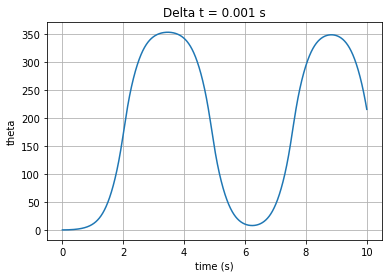

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

CONSTANTE_M = 2 # Masa del carro
CONSTANTE_m = 1 # Masa de la pertiga
CONSTANTE_l = 1 # Longitud dela pertiga

# Simula el modelo del carro-pendulo.
# Parametros:
#   t_max: tiempo maximo (inicia en 0)
#   delta_t: incremento de tiempo en cada iteracion
#   theta_0: Angulo inicial (grados)
#   v_0: Velocidad angular inicial (radianes/s)
#   a_0: Aceleracion angular inicial (radianes/s2)
def simular(t_max, delta_t, theta_0, v_0, a_0):
  theta = (theta_0 * np.pi) / 180
  v = v_0
  a = a_0

  # Simular
  velocidades = []
  y = []
  x = np.arange(0, t_max, delta_t)
  for t in x:
    a = calcula_aceleracion(theta, v, 0)
    v = v + a * delta_t
    velocidades.append(v)
    theta = theta + v * delta_t + a * np.power(delta_t, 2) / 2
    y.append(theta*180/np.pi)

  print(f'Vmax={max(velocidades)} --- Vmin={min(velocidades)}')

  fig, ax = plt.subplots()
  ax.plot(x, y)

  ax.set(xlabel='time (s)', ylabel='theta', title='Delta t = ' + str(delta_t) + " s")
  ax.grid()
  
  plt.show()


# Calcula la aceleracion en el siguiente instante de tiempo dado el angulo y la velocidad angular actual, y la fuerza ejercida
def calcula_aceleracion(theta, v, f):
    numerador = constants.g * np.sin(theta) + np.cos(theta) * ((-f - CONSTANTE_m * CONSTANTE_l * np.power(v, 2) * np.sin(theta)) / (CONSTANTE_M + CONSTANTE_m))
    denominador = CONSTANTE_l * (4/3 - (CONSTANTE_m * np.power(np.cos(theta), 2) / (CONSTANTE_M + CONSTANTE_m)))
    return numerador / denominador

simular(10, 0.001, 1, 0, 0)

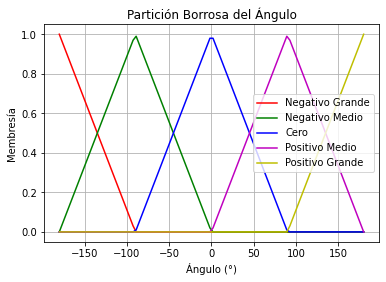

[[1.0, 0, 0, 0, 0], [0.9595959595959597, 0.04040404040404029, 0, 0, 0], [0.9191919191919191, 0.0808080808080809, 0, 0, 0], [0.8787878787878788, 0.12121212121212119, 0, 0, 0], [0.8383838383838386, 0.16161616161616146, 0, 0, 0], [0.7979797979797979, 0.20202020202020207, 0, 0, 0], [0.7575757575757577, 0.24242424242424238, 0, 0, 0], [0.7171717171717173, 0.28282828282828265, 0, 0, 0], [0.6767676767676767, 0.32323232323232326, 0, 0, 0], [0.6363636363636365, 0.36363636363636354, 0, 0, 0], [0.5959595959595958, 0.40404040404040414, 0, 0, 0], [0.5555555555555556, 0.4444444444444444, 0, 0, 0], [0.5151515151515152, 0.48484848484848475, 0, 0, 0], [0.47474747474747464, 0.5252525252525253, 0, 0, 0], [0.43434343434343436, 0.5656565656565656, 0, 0, 0], [0.3939393939393939, 0.6060606060606061, 0, 0, 0], [0.3535353535353535, 0.6464646464646465, 0, 0, 0], [0.3131313131313132, 0.6868686868686869, 0, 0, 0], [0.27272727272727276, 0.7272727272727273, 0, 0, 0], [0.2323232323232323, 0.7676767676767677, 0, 0, 0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# La función fuzzy_partition(angle) calcula la membresía para cada conjunto dado un ángulo de entrada
def fuzzy_partition(angle):
    sets = ['Negativo Grande', 'Negativo Medio', 'Cero', 'Positivo Medio', 'Positivo Grande']
    peaks = [-180, -90, 0, 90, 180]
    widths = [90, 90, 90, 90, 90]
    
    membership = []
    
    for i in range(len(sets)):
        if angle <= peaks[i] - widths[i] or angle >= peaks[i] + widths[i]:
            membership.append(0)
        elif peaks[i] - widths[i] <= angle <= peaks[i]:
            membership.append((angle - (peaks[i] - widths[i])) / widths[i])
        elif peaks[i] <= angle <= peaks[i] + widths[i]:
            membership.append((peaks[i] + widths[i] - angle) / widths[i])
        else:
            membership.append(1)
    
    return membership

# Generar datos de ángulo entre -180° y 180°
angles = np.linspace(-180, 180, 100)

# Calcular la membresía para cada ángulo
membership_values = [fuzzy_partition(angle) for angle in angles]

# Graficar los conjuntos borrosos
labels = ['Negativo Grande', 'Negativo Medio', 'Cero', 'Positivo Medio', 'Positivo Grande']
colors = ['r', 'g', 'b', 'm', 'y']

for i in range(len(labels)):
    plt.plot(angles, [m[i] for m in membership_values], label=labels[i], color=colors[i])

plt.xlabel('Ángulo (°)')
plt.ylabel('Membresía')
plt.title('Partición Borrosa del Ángulo')
plt.legend()
plt.grid(True)
plt.show()

print(membership_values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\rodri\AppData\Local\Temp\ipykernel_13940\3417094626.py:45: RuntimeWarning: invalid value encountered in double_scalars
  defuzzified_force = np.sum(output_force * force_range) / np.sum(output_force)


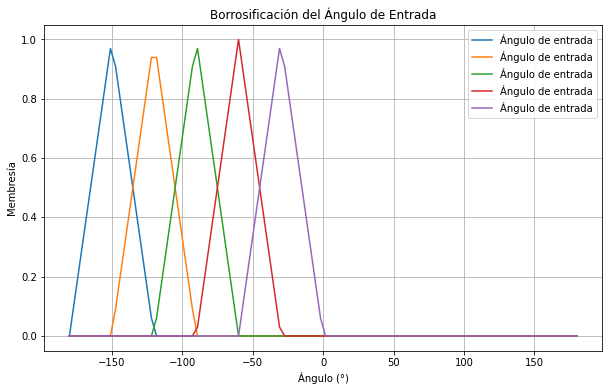

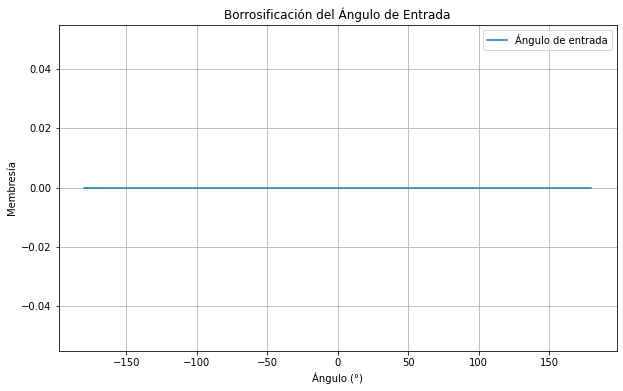

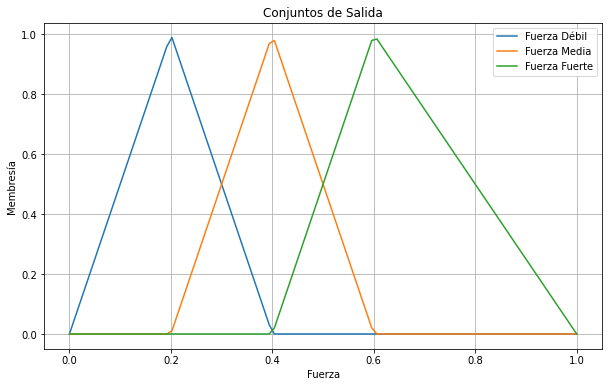

Fuerza desborrosificada: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir función de membresía triangular
def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

# Definir función de membresía singleton
def singleton(x, x0):
    return np.where(x == x0, 1, 0)

# Definir conjuntos borrosos de entrada
angle_range = np.linspace(-180, 180, 100)
angle_large_negative = triangular(angle_range, -180, -150, -120)
angle_medium_negative = triangular(angle_range, -150, -120, -90)
angle_zero = triangular(angle_range, -120, -90, -60)
angle_medium_positive = triangular(angle_range, -90, -60, -30)
angle_large_positive = triangular(angle_range, -60, -30, 0)

# Definir conjuntos borrosos de salida (fuerza)
force_range = np.linspace(0, 1, 100)
force_weak = triangular(force_range, 0, 0.2, 0.4)
force_medium = triangular(force_range, 0.2, 0.4, 0.6)
force_strong = triangular(force_range, 0.4, 0.6, 1)

# Definir ángulo de entrada
input_angle = 45

# Borrosificar el ángulo de entrada
fuzzified_angle = singleton(angle_range, input_angle)
print(fuzzified_angle)

# Realizar inferencia borrosa de Mandani
inference_weak = np.fmin(fuzzified_angle, angle_large_negative)
inference_medium = np.fmin(fuzzified_angle, angle_medium_negative)
inference_medium += np.fmin(fuzzified_angle, angle_zero)
inference_medium += np.fmin(fuzzified_angle, angle_medium_positive)
inference_strong = np.fmin(fuzzified_angle, angle_large_positive)

# Obtener el resultado final de la inferencia
output_force = np.zeros_like(force_range)
output_force += np.fmax(np.fmax(np.fmax(inference_weak, inference_medium), inference_medium), inference_strong)

# Desborrosificar usando el método "middle of maxima"
defuzzified_force = np.sum(output_force * force_range) / np.sum(output_force)

# Graficar conjuntos de entrada
plt.figure(figsize=(10, 6))
plt.plot(angle_range, angle_large_negative, label='Ángulo de entrada')
plt.plot(angle_range, angle_medium_negative, label='Ángulo de entrada')
plt.plot(angle_range, angle_zero, label='Ángulo de entrada')
plt.plot(angle_range, angle_medium_positive, label='Ángulo de entrada')
plt.plot(angle_range, angle_large_positive, label='Ángulo de entrada')
#plt.fill_between(angle_range, fuzzified_angle, color='lightblue')
plt.xlabel('Ángulo (°)')
plt.ylabel('Membresía')
plt.title('Borrosificación del Ángulo de Entrada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar conjuntos de entrada
plt.figure(figsize=(10, 6))
plt.plot(angle_range, fuzzified_angle, label='Ángulo de entrada')
plt.fill_between(angle_range, fuzzified_angle, color='lightblue')
plt.xlabel('Ángulo (°)')
plt.ylabel('Membresía')
plt.title('Borrosificación del Ángulo de Entrada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar conjuntos de salida
plt.figure(figsize=(10, 6))
plt.plot(force_range, force_weak, label='Fuerza Débil')
plt.plot(force_range, force_medium, label='Fuerza Media')
plt.plot(force_range, force_strong, label='Fuerza Fuerte')
plt.fill_between(force_range, output_force, color='lightblue')
plt.xlabel('Fuerza')
plt.ylabel('Membresía')
plt.title('Conjuntos de Salida')
plt.legend()
plt.grid(True)
plt.show()


# Desborrosificar usando el método "middle of maxima"
sum_output_force = np.sum(output_force)
if sum_output_force == 0:
    defuzzified_force = 0  # Valor predeterminado cuando no hay contribución
else:
    defuzzified_force = np.sum(output_force * force_range) / sum_output_force

print("Fuerza desborrosificada:", defuzzified_force)